## Contents

1. [Importing Libraries](#1.-Importing-Libraries)     
	1.1. [Importing Dataframes](#1.1-Importing-Dataframes)      
2. [Creating a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart](#2.-Creating-a-bar-chart,-a-histogram,-a-scatterplot,-and-a-line-chart,-using-a-sample-subset-for-the-line-chart)   
	2.1. [Bar chart](#2.1-Bar-chart)    
	2.2. [Histograms](#2.2-Histogram)    
	2.3. [Scatterplot](#2.3-Scatterplot)     
	2.4. [Line Chart using a sample subset](#2.4-Line-Chart-using-a-sample-subset)   
3. [Providing the Instacart senior stakeholders with descriptive findings about sales by creating a histogram of the “order_hour_of_day” column](#3.-Providing-the-Instacart-senior-stakeholders-with-descriptive-findings-about-sales-by-creating-a-histogram-of-the-“order-hour-of-day”-column)     
4. [The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.](#4.-The-marketing-team-is-curious-about-the-distribution-of-orders-among-customers-in-terms-of-loyalty.-Create-a-bar-chart-from-the-“loyalty-flag”-column.)    
5. [Whether there's a difference in expenditure depending on the hour of the day.](#5.-Whether-there's-a-difference-in-expenditure-depending-on-the-hour-of-the-day.)    
6. [Conducting some exploratory analysis of customer demographics to inform the targeted marketing campaigns](#6.-Conducting-some-exploratory-analysis-of-customer-demographics-to-inform-the-targeted-marketing-campaigns)   
	6.1.[Creating a line chart exploring the connections between age and number of dependents](#6.1-Creating-a-line-chart-exploring-the-connections-between-age-and-number-of-dependents)    
7. [Creating a scatterplot to explore whether there's a connection between age and spending power (income)](#7.-Creating-a-scatterplot-to-explore-whether-there's-a-connection-between-age-and-spending-power(income))    
8. [Exporting visualisations as '.png'](#8.-Exporting-visualisations-as-'.png')   

## 1. Importing Libraries

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 1.2. Importing Dataframe

In [4]:
# Importing df_combined
path = r'C:\Users\User 1\Documents\Instacart Basket Analysis 04-2023'

In [5]:
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_combined.pkl'))

## 2. Creating a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

### 2.1. Bar Chart

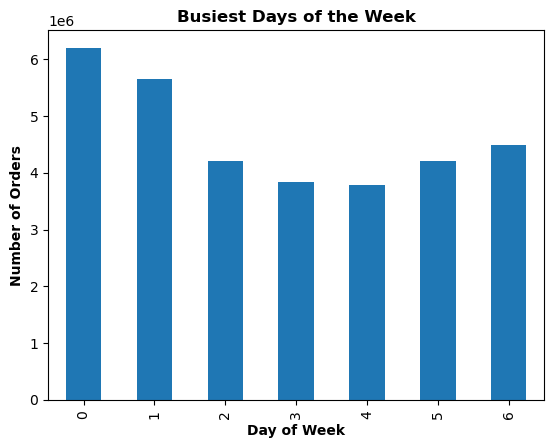

In [6]:
# Creating a bar chart for 'orders_day_of_week' column
bar = df_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Day of Week', fontweight = 'bold')
plt.ylabel('Number of Orders', fontweight = 'bold')
plt.title('Busiest Days of the Week', fontweight = 'bold')
plt.show()

### 2.2. Histograms

<Axes: ylabel='Frequency'>

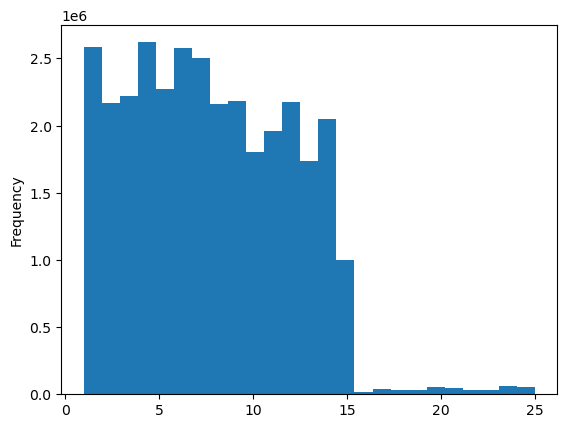

In [7]:
# Creating a histogram of the 'prices' column
df_combined['prices'].plot.hist(bins = 25)

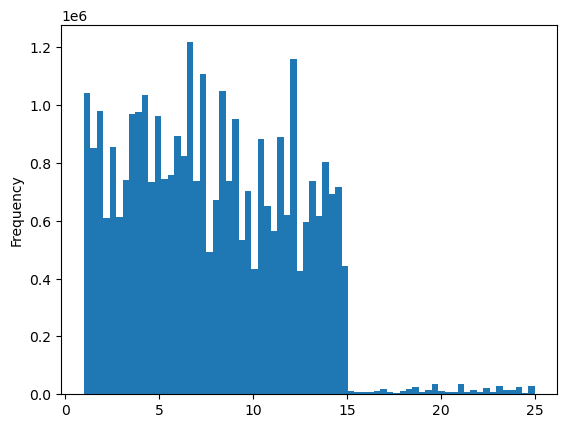

In [8]:
# To increase the granularity
hist_2 = df_combined['prices'].plot.hist(bins = 70)

### 2.3. Scatterplot

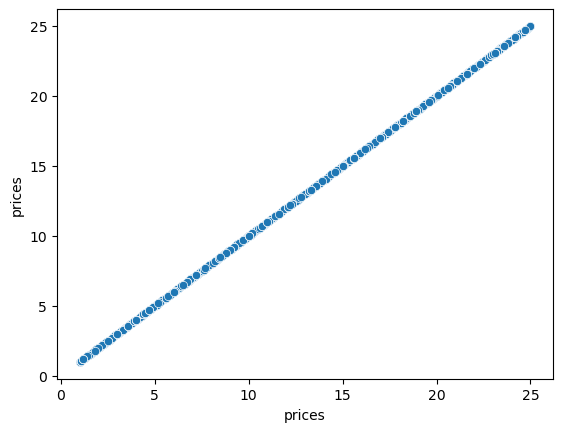

In [9]:
# Creating a scatterplot for plotting the 'prices' column against itself
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices', data = df_combined)

### 2.4. Line Chart using a sample subset

### To create a line chart to show the development of 'prices' across the days of the week, we would need to use a sample because otherwise the line chart would require a huge amount of computing power. 
### In order to get a sample that is representative of the population, it is not enought to choose the first or last 2,000,000 rows. Instead, we need to sample data that is a representative of the dataframe whilst being random.
### Therefore, I will split the df_combined into two samples with the same distribution: 70/30 split.

### Sampling Data

In [10]:
# Set the seed for the random number generator.
# Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [11]:
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [12]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
# Store 70% of the sample in the dataframe big
big = df_combined[dev]

In [14]:
# Store 30% of the sample in the dataframe small
small = df_combined[~dev]

In [15]:
# Checking the results
len(df_combined)

32404859

In [16]:
len(big) + len(small)

32404859

In [17]:
# Creating a sample subset for the line chart
df_small = small[['orders_day_of_week', 'prices']]

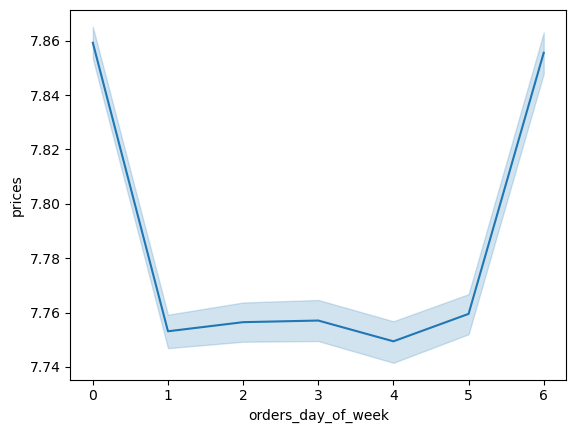

In [18]:
# Creating a line chart using the sample subset
line_chart_week_prices = sns.lineplot(data = df_small, x = 'orders_day_of_week', y = 'prices')

## 3. Providing the Instacart senior stakeholders with descriptive findings about sales by creating a histogram of the “order_hour_of_day” column

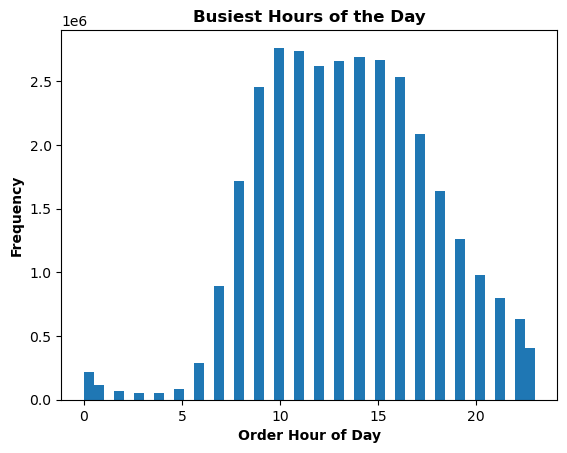

In [19]:
hist_order_hour_of_day = df_combined['order_hour_of_day'].plot.hist(bins = 45)
plt.xlabel('Order Hour of Day', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.title('Busiest Hours of the Day', fontweight = 'bold')
plt.show()

### The histogram shows the frequency distribution of the orders processed for each hour of the day. Each bar covers one hour of time and the height indicates the number of orders in each time range. We can see that the largest frequency of orders were received between 8am and 6pm, with a longer tail to the left than to the right. We can also see the fewest orders were received from 0.00am to 6am after which, order frequencies started to increase exponentially. The frequency distribution is negatively skewed.

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

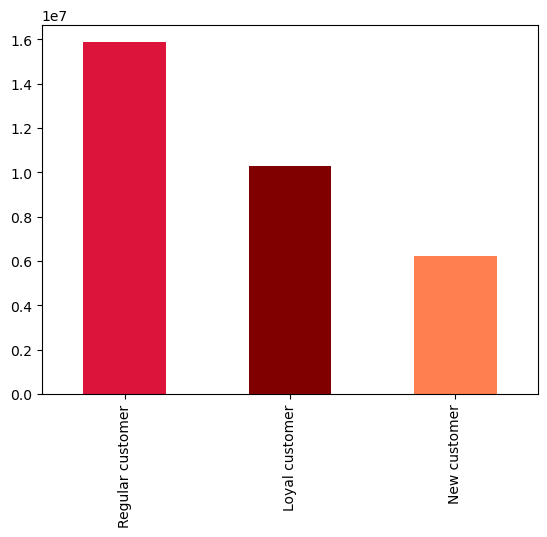

In [20]:
# Creating a bar chart
barchart_customer_loyalty = df_combined['loyalty_flag'].value_counts().plot.bar(color = ['crimson', 'maroon', 'coral'])

## 5. Whether there's a difference in expenditure depending on the hour of the day.

In [21]:
# Creating a subset df for the line chart
df_order_hour_of_day_prices = small[['order_hour_of_day', 'prices']]

In [22]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,12.6
6,8,12.6
10,11,4.3


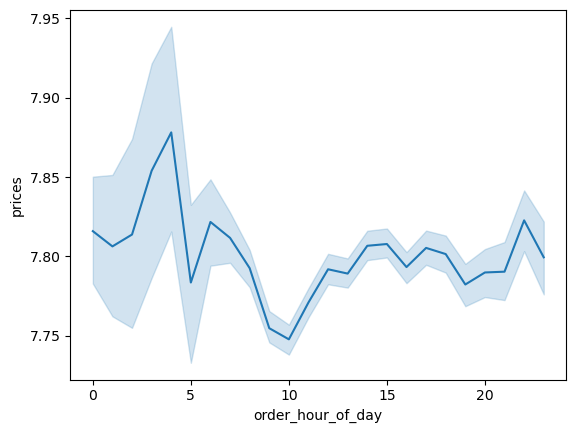

In [23]:
# Creating a line chart using the sample subset
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day', y= 'prices')

## 6. Conducting some exploratory analysis of customer demographics to inform the targeted marketing campaigns

In [24]:
# Creating a subset for the line chart
df_age_dependants = small[['age', 'number_of_dependants']]

In [25]:
df_age_dependants.head()


,age,number_of_dependants
0,48,3
2,48,3
3,48,3
6,48,3
10,48,3


### 6.1. Creating a line chart exploring the connections between age and number of dependents

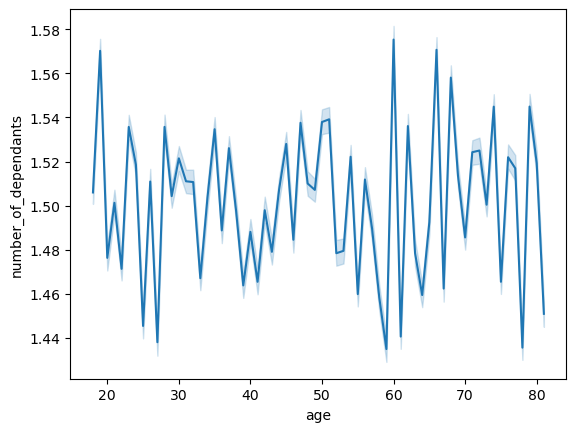

In [26]:
# Creating a line chart using the subset
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age', y = 'number_of_dependants')

#### Observation: There is no correlation between age and the number of dependants.

## 7. Creating a scatterplot to explore whether there's a connection between age and spending power (income)

In [27]:
# Creating a subset for the scatterplot
df_age_income = small[['age', 'income']]

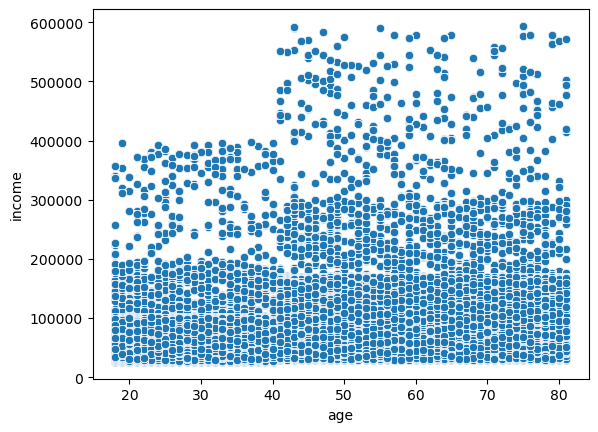

In [28]:
# Creating a scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

### The scatterplot shows that as the age increases, the income increases. Additionally, the scatterplot shows a correlation that there are lower income values from people under 40 and high income values for those over 40. Ultimately, the scatterplot shows that the majority of people have an annual income less than 200,000 dollars.

## 8. Exporting visualisations as '.png'

In [ ]:
# 01. Exporting bar chart as png (Exercise)
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

In [ ]:
# 02. Exporting histogram for prices (Exercise)
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_2.png'))

In [ ]:
# 03. Exporting scatterplot for the correlation of prices (Exercise)
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatterplot_prices.png'))

In [ ]:
# 04. Exporting line chart on week and prices
line_chart_week_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_chart_week_prices.png'))

In [ ]:
# Exporting histogram to look at the frequency distribution of order_hour_of_day and orders
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_order_hour_of_day.png'))

In [ ]:
# Exporting a bar chart for customer loyalty
barchart_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'barchart_customer_loyalty.png'))

In [ ]:
# Exporting line chart for order_hour_of_day and prices
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_chart_order_hour_of_day_prices.png'))

In [ ]:
# Exporting line chart for age and number of dependants
line_chart_age_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_chart_age_dependants.png'))

In [ ]:
# Exporting Scatterplot showing the correlation between age and income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatterplot_age_income.png'))